In [1]:
import datetime as dt

import pandas as pd

import matplotlib.pyplot as plt

import numpy as np

import seaborn as sns

# from mpl_toolkits.basemap import Basemap

from sklearn.model_selection import TimeSeriesSplit

plt.style.use('ggplot')

%config InlineBackend.figure_format = 'retina'

import warnings

warnings.filterwarnings ('ignore')

list_of_names = ["C:\\Users\\priya\\OneDrive\\Desktop\\AccidentsBig.csv", "C:\\Users\\priya\\OneDrive\\Desktop\\VehiclesBig.csv", "C:\\Users\\priya\\OneDrive\\Desktop\\CasualtiesBig.csv"]

# Initialize an empty DataFrame
combined_df = pd.DataFrame()

# Read each CSV file and append to the combined DataFrame
for file in list_of_names:
    df = pd.read_csv(file)
    combined_df = combined_df.append(df, ignore_index=True)

In [2]:
import os

In [3]:
accidents = pd.read_csv("C:\\Users\\priya\\OneDrive\\Desktop\\AccidentsBig.csv", index_col = 'Accident_Index')
print("Successfully")

Successfully


In [4]:
print("Accidents")
print("size=", accidents.size)
print(accidents.shape)
accidents.head()

Accidents
size= 30408675
(1048575, 29)


,longitude,latitude,Police_Force,Accident_Severity,Number_of_Vehicles,Number_of_Casualties,Day_of_Week,Time,Local_Authority_(District),Local_Authority_(Highway),...,Pedestrian_Crossing-Physical_Facilities,Light_Conditions,Weather_Conditions,Road_Surface_Conditions,Special_Conditions_at_Site,Carriageway_Hazards,Urban_or_Rural_Area,Did_Police_Officer_Attend_Scene_of_Accident,LSOA_of_Accident_Location,Date
Accident_Index,,,,,,,,,,,,,,,,,,,,,
1.0,78.610393,14.724026,1.0,2.0,1.0,1.0,3.0,17:42,12.0,E09000020,...,1.0,1.0,2.0,2.0,0.0,0.0,1.0,1.0,E01002849,04-01-2018
2.0,78.534042,14.762353,1.0,3.0,1.0,1.0,4.0,17:36,12.0,E09000020,...,5.0,4.0,1.0,1.0,0.0,0.0,1.0,1.0,E01002909,05-01-2018
3.0,78.470877,14.745606,1.0,3.0,2.0,1.0,5.0,00:15,12.0,E09000020,...,0.0,4.0,1.0,1.0,0.0,0.0,1.0,1.0,E01002857,06-01-2018
4.0,78.557994,14.667128,1.0,3.0,1.0,1.0,6.0,10:35,12.0,E09000020,...,0.0,1.0,1.0,1.0,0.0,0.0,1.0,1.0,E01002840,07-01-2018
5.0,78.576431,14.703443,1.0,3.0,1.0,1.0,2.0,21:13,12.0,E09000020,...,0.0,7.0,1.0,2.0,0.0,0.0,1.0,1.0,E01002863,10-01-2018


In [5]:
accidents.isnull().sum()

longitude                                      988577
latitude                                       988577
Police_Force                                   988577
Accident_Severity                              988577
Number_of_Vehicles                             988577
Number_of_Casualties                           988577
Day_of_Week                                    988577
Time                                           988578
Local_Authority_(District)                     988577
Local_Authority_(Highway)                      988577
1st_Road_Class                                 988577
1st_Road_Number                                988577
Road_Type                                      988577
Speed_limit                                    988577
Junction_Detail                                988577
Junction_Control                               988577
2nd_Road_Class                                 988577
2nd_Road_Number                                988577
Pedestrian_Crossing-Human_Co

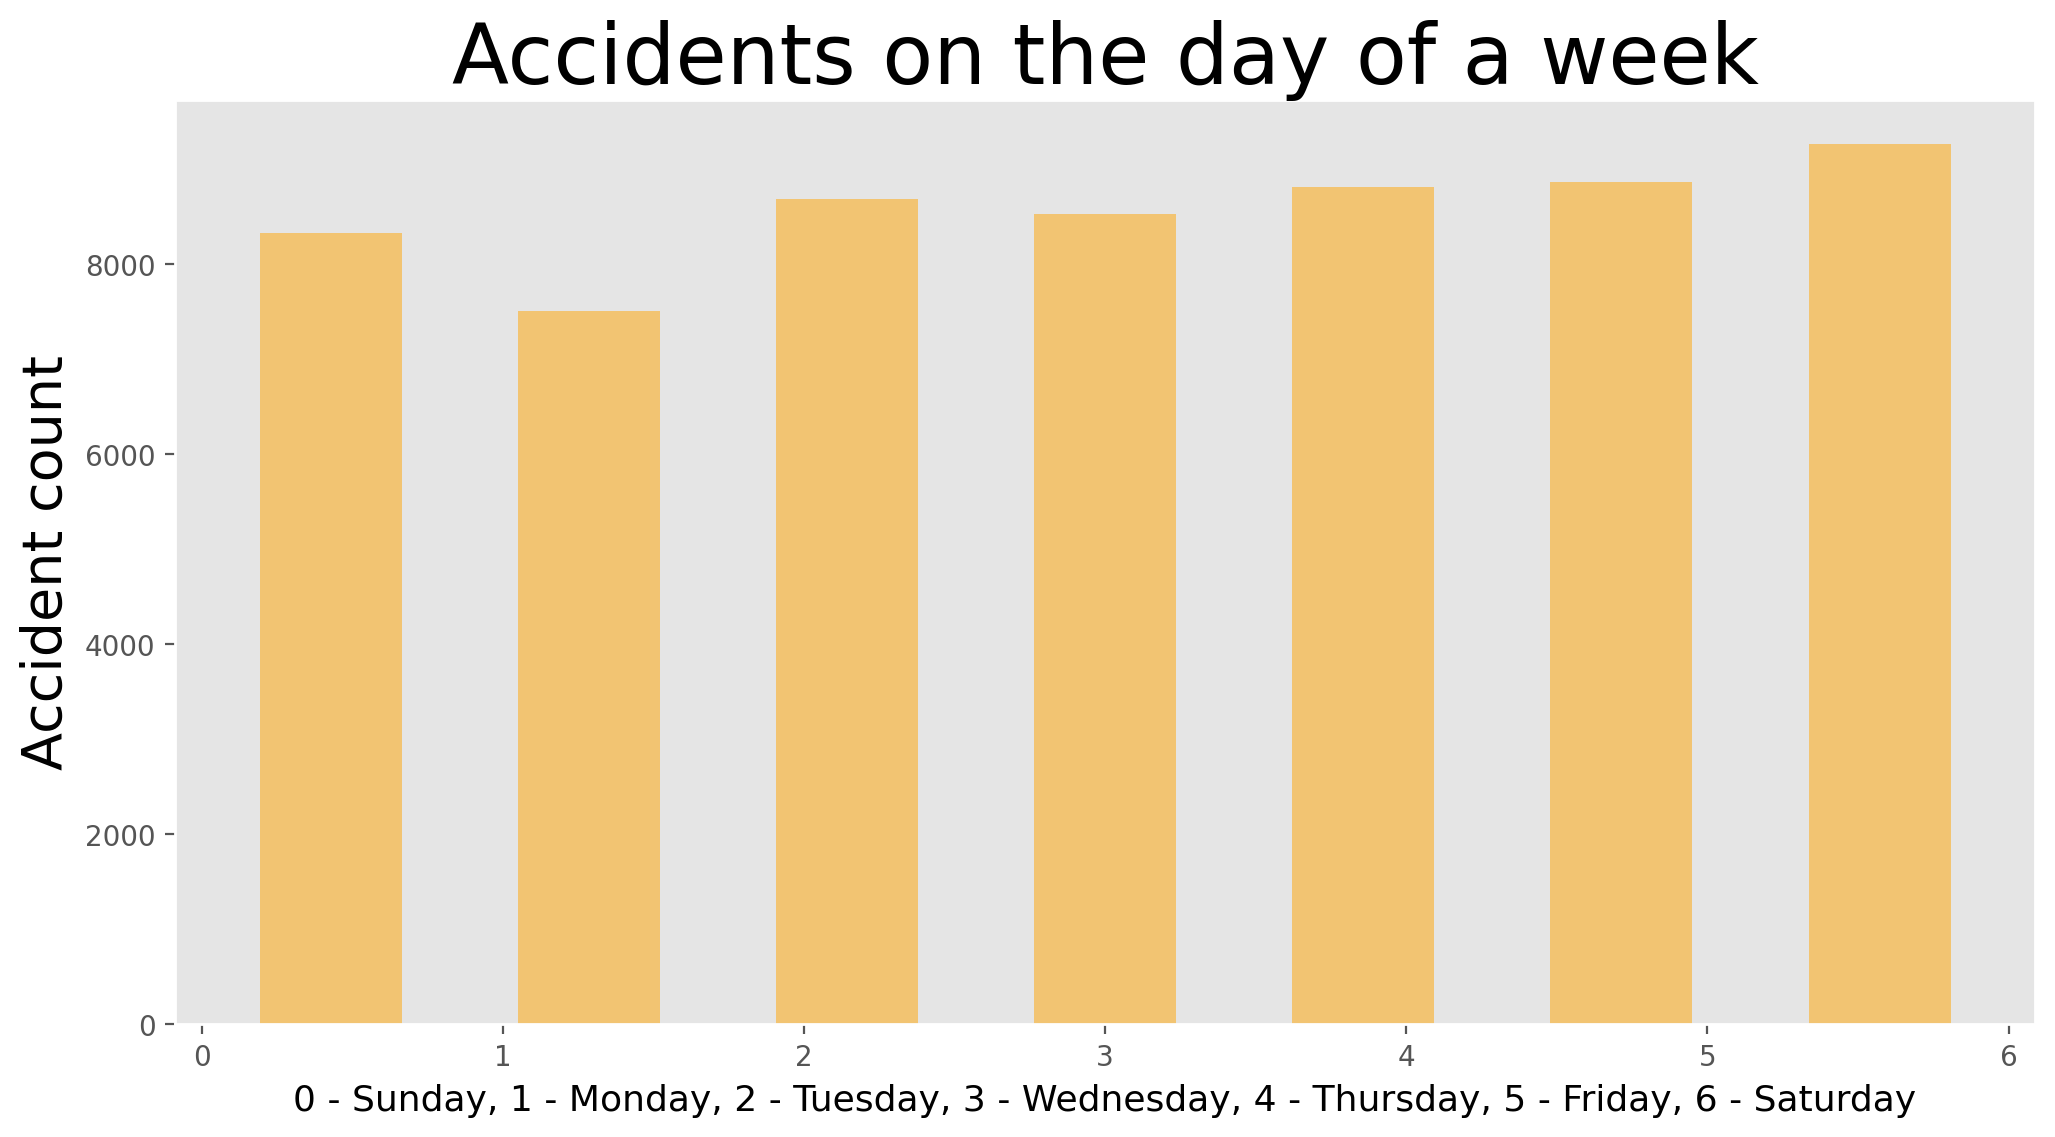

In [6]:
#DataVisualization

plt.figure(figsize=(12,6))

accidents['Date'] = pd.to_datetime(accidents['Date'])

accidents.Date.dt.dayofweek.hist(bins=7,rwidth=0.55,alpha=0.5, color= 'orange')

plt.title('Accidents on the day of a week', fontsize= 30)

plt.grid(False)

plt.ylabel('Accident count', fontsize = 20)

plt.xlabel('0 - Sunday, 1 - Monday, 2 - Tuesday, 3 - Wednesday, 4 - Thursday, 5 - Friday, 6 - Saturday', fontsize = 13)
plt.show()

Text(0, 0.5, 'Accident count')

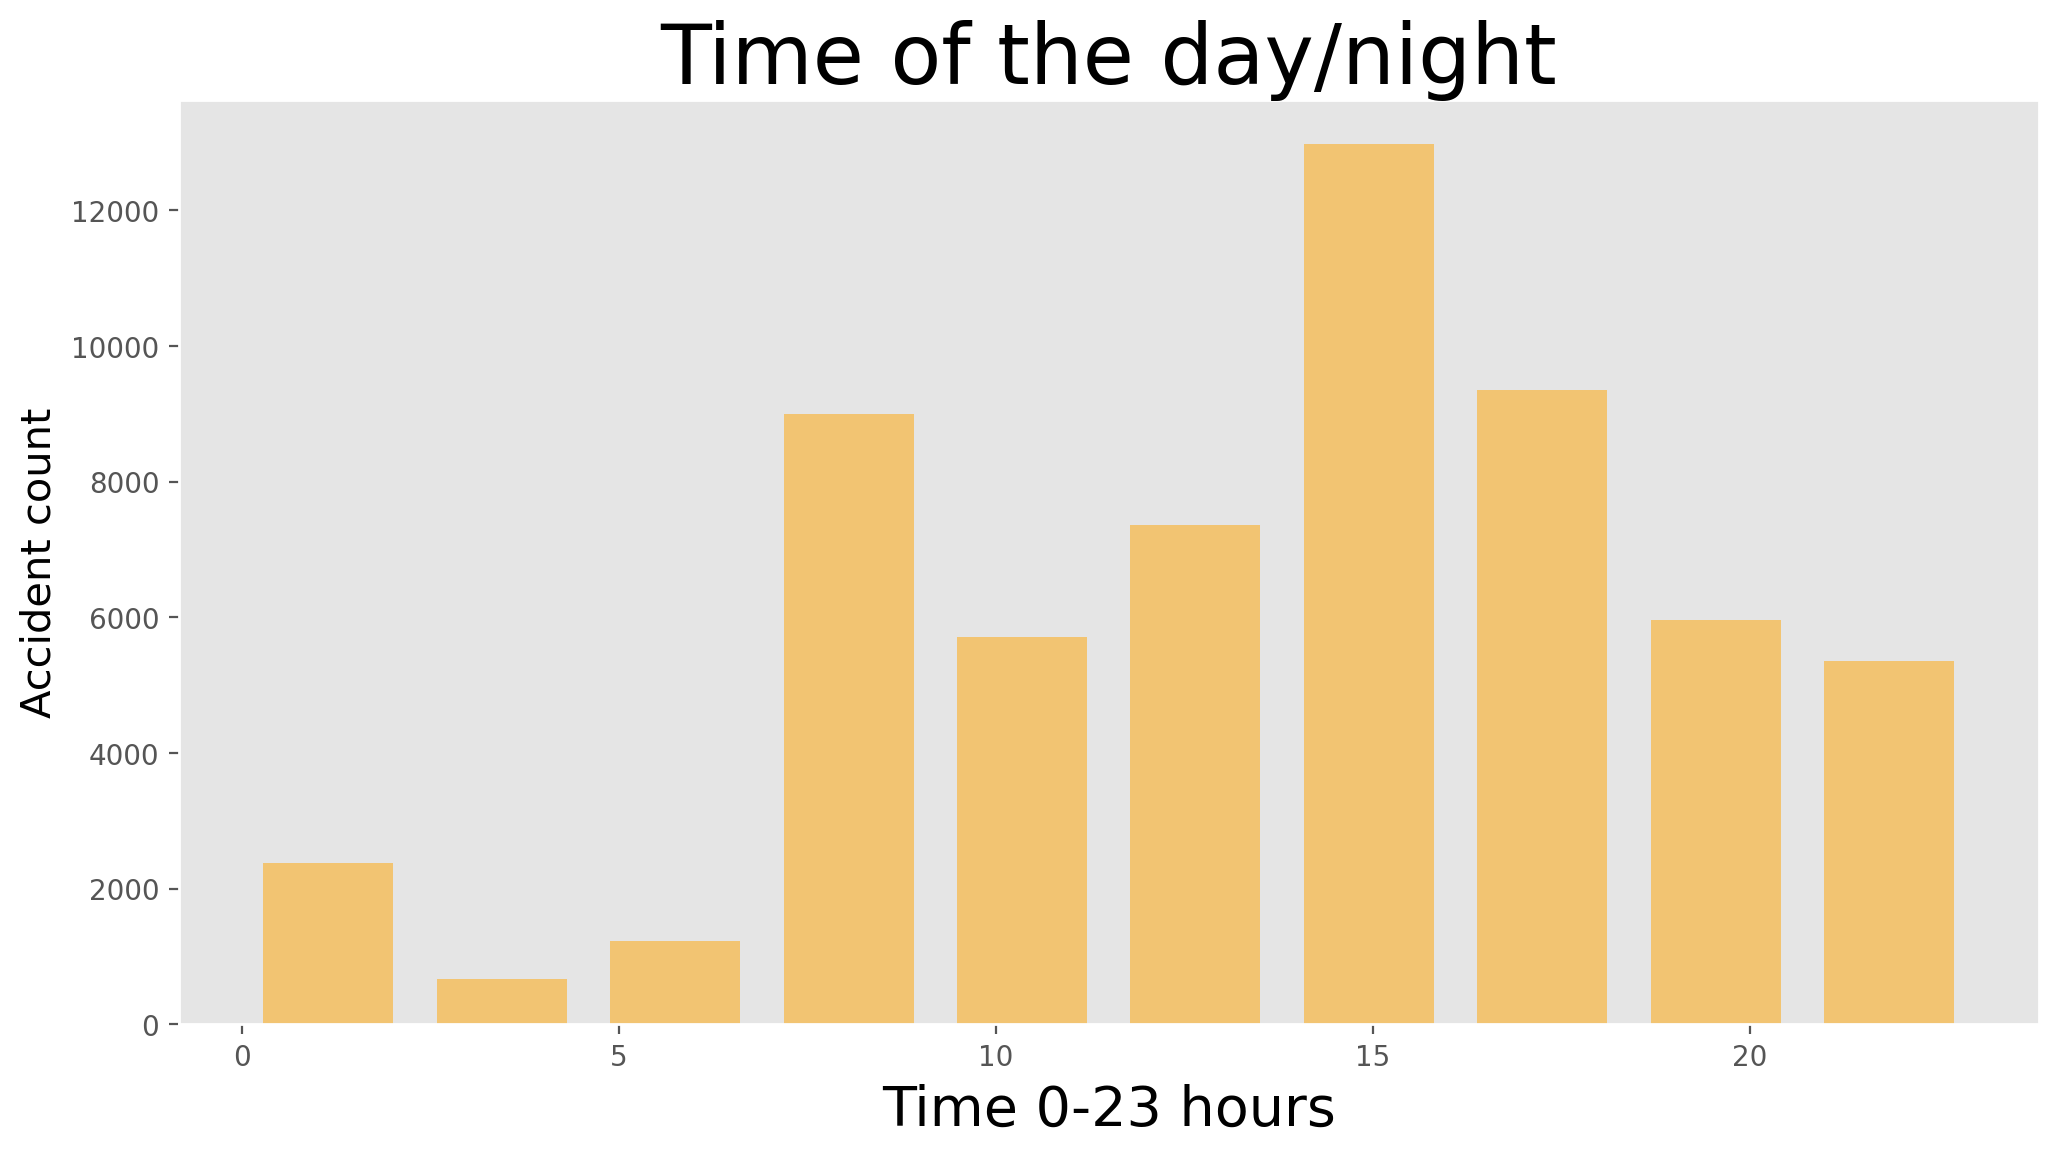

In [9]:
plt.figure(figsize=(12,6))

accidents['Time'] = pd.to_datetime(accidents['Time'])

accidents.Time.dt.hour.hist(rwidth=0.75, alpha =0.50, color= 'orange')

plt.title('Time of the day/night', fontsize= 30)

plt.grid(False)

plt.xlabel('Time 0-23 hours', fontsize = 20)

plt.ylabel('Accident count', fontsize = 15)

<Axes: >

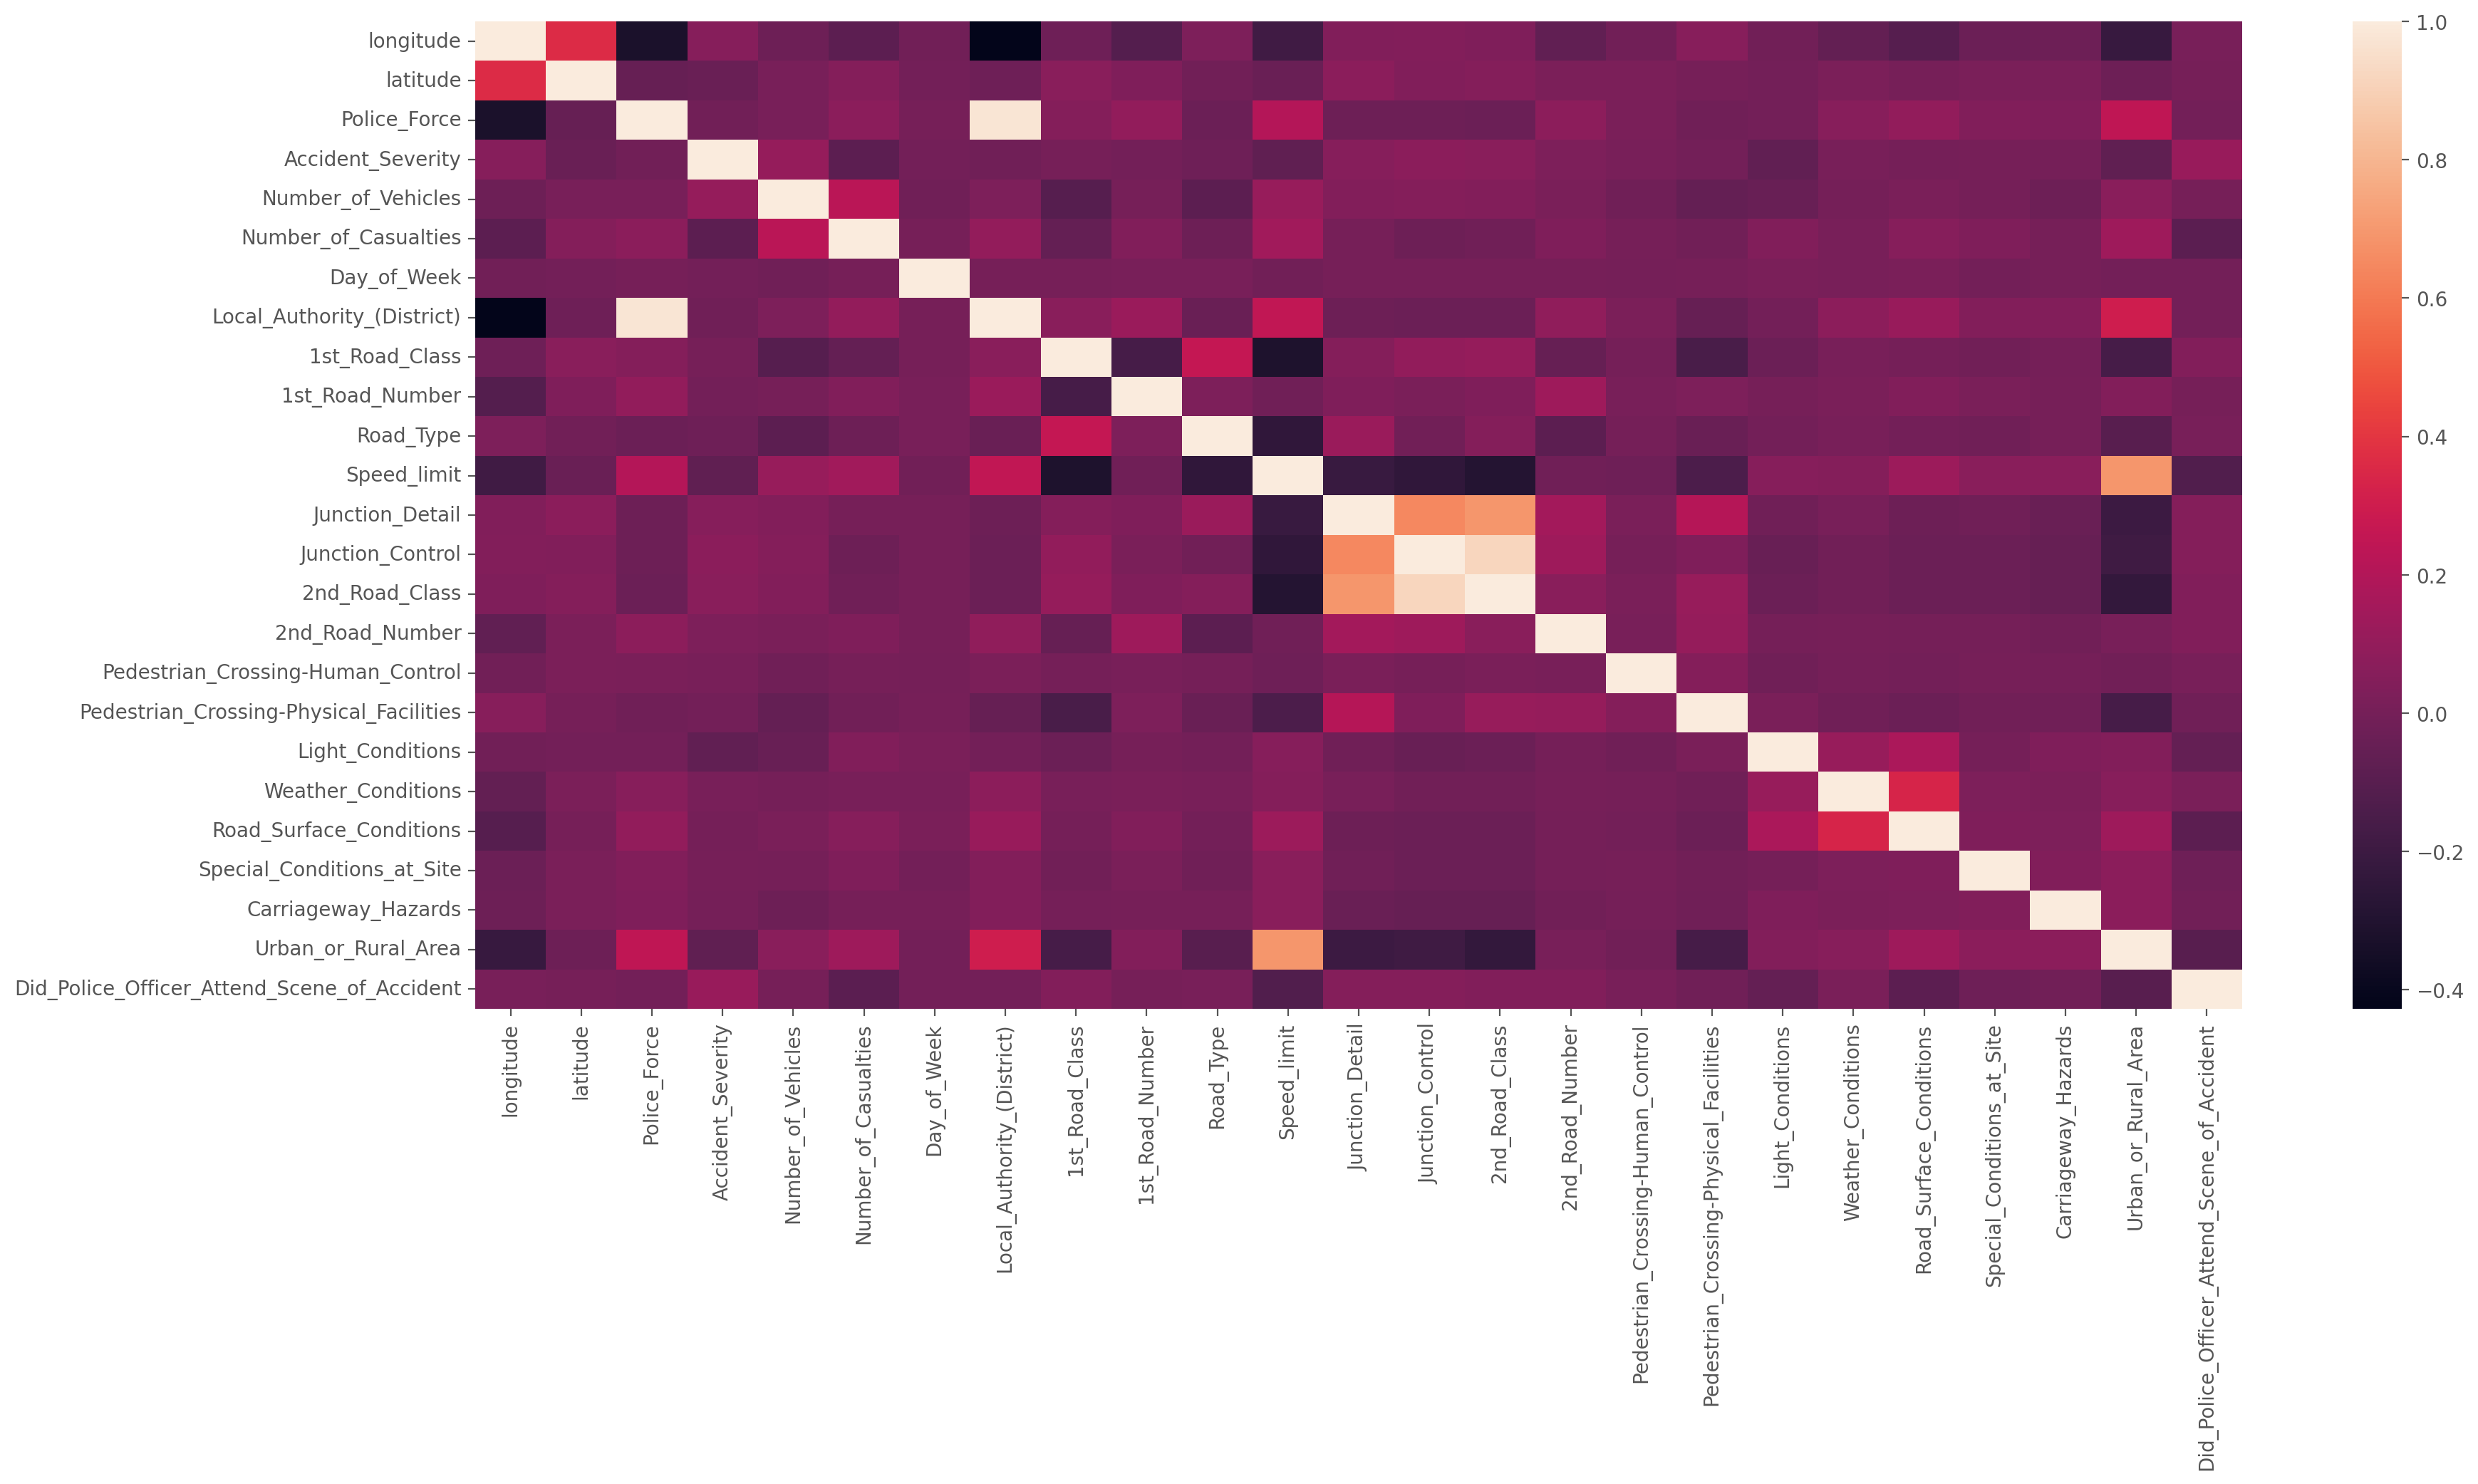

In [15]:
corr = accidents.corr()
plt.subplots(figsize=(20,9))
sns.heatmap(corr)

In [17]:
#Machine Learning

from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression

from sklearn.metrics import accuracy_score

from sklearn.metrics import classification_report

from sklearn.tree import DecisionTreeClassifier

from sklearn.ensemble import RandomForestClassifier

from sklearn.svm import SVC, LinearSVC

from sklearn.metrics import log_loss 

print("done")


done


done


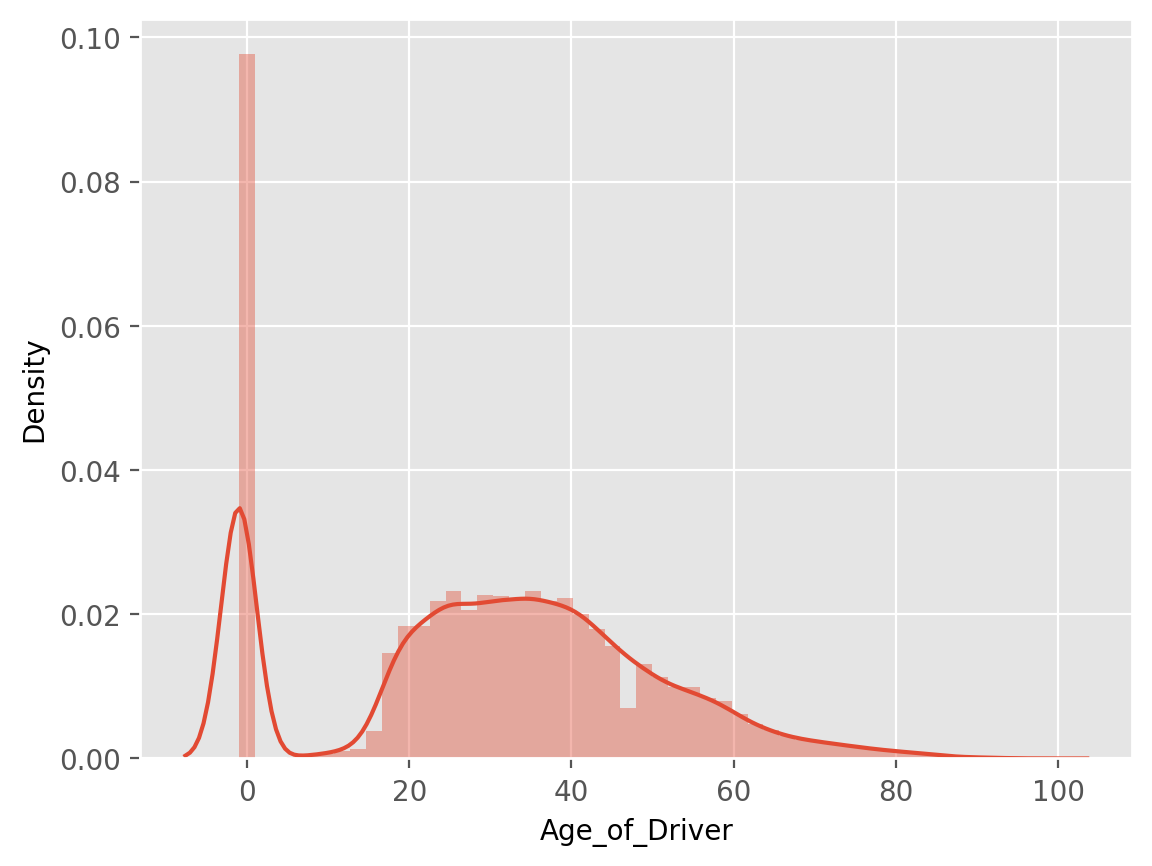

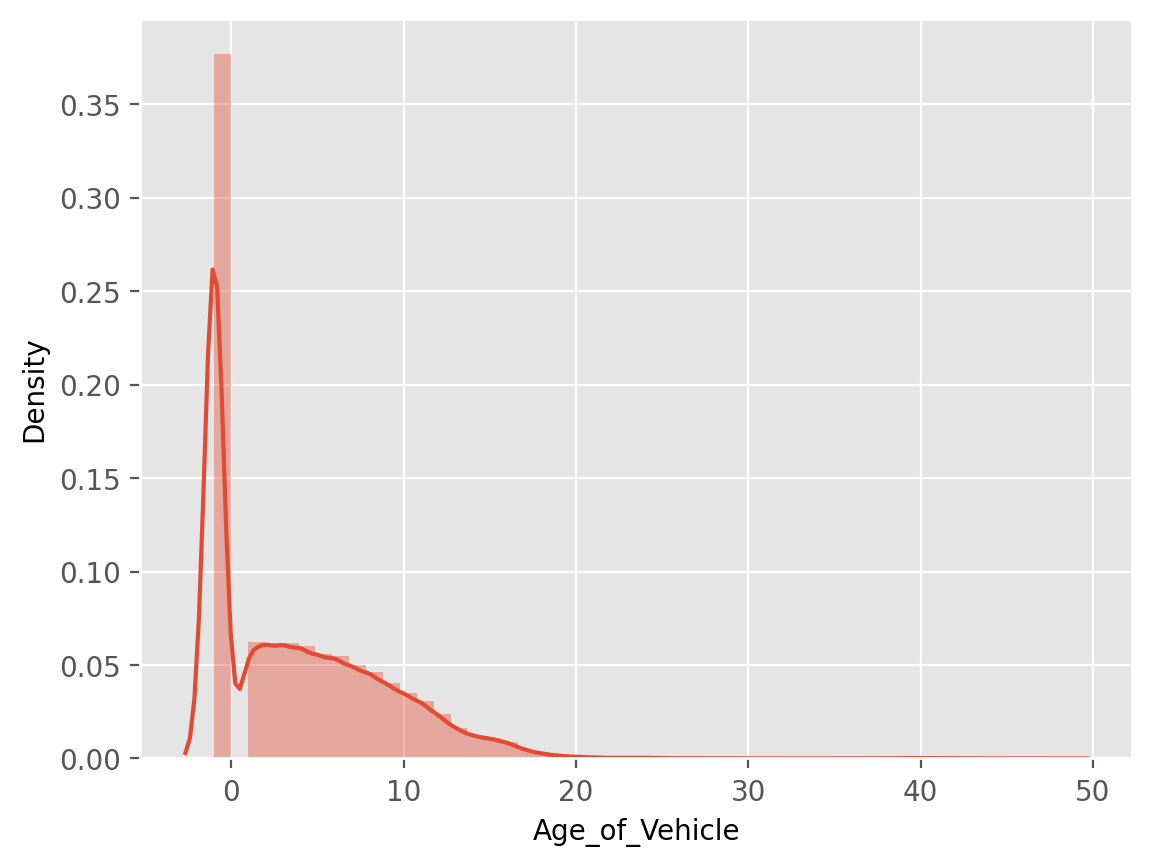

<Figure size 640x480 with 0 Axes>

In [19]:
#Normalize the Data
accidents = pd.read_csv("C:\\Users\\priya\\OneDrive\\Desktop\VehiclesBig.csv")

sns.distplot(accidents['Age_of_Driver']); fig = plt.figure()

sns.distplot(accidents['Age_of_Vehicle']);

fig = plt.figure()

print("done")

In [38]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
import pandas as pd

# Example dataset (replace this with your actual dataset)
# Assuming you have a DataFrame 'data' with features and a target variable
# data = pd.read_csv('your_data.csv')  # Load your dataset

# Example: Splitting the dataset into features and target
# x = data.drop('target_column', axis=1)  # Replace 'target_column' with your actual target column name
# y = data['target_column']

# For demonstration, let's create a dummy dataset
from sklearn.datasets import make_classification
x, y = make_classification(n_samples=100, n_features=20, random_state=42)

# Splitting the dataset into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# Now we can create and fit the RandomForestClassifier
random_forest = RandomForestClassifier(n_estimators=200)

random_forest.fit(x_train, y_train)

Y_pred = random_forest.predict(x_test)

acc_random_forest1 = round(random_forest.score(x_test, y_test) * 100, 2)

sk_report = classification_report(y_true=y_test, y_pred=Y_pred, digits=6)

print("Accuracy", acc_random_forest1)
print(sk_report)

# Displaying the confusion matrix
pd.crosstab(y_test, Y_pred, rownames=['Actual'], colnames=['Predicted'], margins=True)

print("done")

Accuracy 90.0
              precision    recall  f1-score   support

           0   1.000000  0.846154  0.916667        13
           1   0.777778  1.000000  0.875000         7

    accuracy                       0.900000        20
   macro avg   0.888889  0.923077  0.895833        20
weighted avg   0.922222  0.900000  0.902083        20

done


In [45]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report
import pandas as pd

# Example dataset (replace this with your actual dataset)
# Assuming you have a DataFrame 'data' with features and a target variable
# data = pd.read_csv('your_data.csv')  # Load your dataset

# Define features and target variable
# X = data.drop('target_column', axis=1)  # Replace 'target_column' with your actual target column name
# y = data['target_column']  # Replace with your actual target column name

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# Initialize the Decision Tree Classifier
decision_tree = DecisionTreeClassifier()

# Fit the model
decision_tree.fit(X_train, y_train)

# Make predictions
Y_pred = decision_tree.predict(X_test)

# Calculate accuracy
acc_decision_tree1 = round(decision_tree.score(X_test, y_test) * 100, 2)

# Generate classification report
sk_report = classification_report(y_true=y_test, y_pred=Y_pred, digits=6)

# Print accuracy and report
print("Accuracy", acc_decision_tree1)
print(sk_report)

# Confusion Matrix
pd.crosstab(y_test, Y_pred, rownames=['Actual'], colnames=['Predicted'], margins=True)

Accuracy 90.0
              precision    recall  f1-score   support

           0   1.000000  0.846154  0.916667        13
           1   0.777778  1.000000  0.875000         7

    accuracy                       0.900000        20
   macro avg   0.888889  0.923077  0.895833        20
weighted avg   0.922222  0.900000  0.902083        20



Predicted,0,1,All
Actual,,,
0,11,2,13
1,0,7,7
All,11,9,20


In [53]:
lr = LogisticRegression()

## Fit the model on the trainng data.

lr.fit(X_train, y_train)

y_pred = lr.predict(X_test)

sk_report = classification_report(

digits=6,

y_true=y_test,

y_pred=y_pred)

print("Accuracy", round(accuracy_score(y_pred, y_test)*100,2))

print(sk_report)

pd.crosstab(y_test, y_pred, rownames=['Actual'], colnames=['Predicted'],

margins=True)

Accuracy 100.0
              precision    recall  f1-score   support

           0   1.000000  1.000000  1.000000        13
           1   1.000000  1.000000  1.000000         7

    accuracy                       1.000000        20
   macro avg   1.000000  1.000000  1.000000        20
weighted avg   1.000000  1.000000  1.000000        20



Predicted,0,1,All
Actual,,,
0,13,0,13
1,0,7,7
All,13,7,20
